In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions

### First, dealing with the data

####  1.import the data(pandas)

In [73]:
reg_data = pd.read_csv("D:/NTHU COM/courses/DL/HW1_A141163/2025_energy_efficiency_data.csv")

In [52]:
reg_data[:5]

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
3,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
4,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38


#### 2.one hot encoding(for loop and Numpy)

In [79]:
categorical_data = ['Orientation', 'Glazing Area Distribution']
col_specs = [
    ("Orientation", [2, 3, 4, 5], ["ori_north", "ori_south", "ori_east", "ori_west"]),
    ("Glazing Area Distribution", [0, 1, 2, 3, 4], ["gla_uniform", "gla_north", "gla_south", "gla_east", "gla_west"])
]
for colname, order, new_cols in col_specs:
    a = reg_data[colname].to_numpy()
    a = a.astype(int, copy=False)
    
    code_to_idx = {code: i for i, code in enumerate(order)}

    inv = np.vectorize(lambda x: code_to_idx.get(x, -1))(a)
    
    # one-hot
    oh = np.eye(len(order), dtype=float)[inv]
    for j, name in enumerate(new_cols):
        reg_data[name] = oh[:, j]
        
reg_data = reg_data.drop(columns=categorical_data)
reg_data

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,ori_north,ori_south,ori_east,ori_west,gla_uniform,gla_north,gla_south,gla_east,gla_west
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,21.46,25.38,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.71,710.5,269.5,220.50,3.5,0.4,12.43,15.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
764,0.69,735.0,294.0,220.50,3.5,0.4,14.28,15.87,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.66,759.5,318.5,220.50,3.5,0.4,14.92,17.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0.64,784.0,343.0,220.50,3.5,0.4,18.19,20.21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 3.shuffle data samples for training and for testing(pandas)

In [80]:
from functions import train_test_split
train, test = train_test_split(reg_data, test_size=0.25, random_state=42)

#### 4. store training sample/label and test sample/label properly(pythonlist and Numpy)
- Labels: Heating Load, Cooling Load
- Features: Surface Area, ..., Glazing Area

In [104]:
all_cols = reg_data.columns.tolist() # get all cols
label_cols = ['Heating Load', 'Cooling Load']
feature_cols = [col for col in all_cols if col not in label_cols]

X_train = train[feature_cols]
y_train = train[label_cols]

X_test = test[feature_cols]
y_test = test[label_cols]

In [82]:
X_train

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,ori_north,ori_south,ori_east,ori_west,gla_uniform,gla_north,gla_south,gla_east,gla_west
0,0.69,735.0,294.0,220.50,3.5,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.98,514.5,294.0,110.25,7.0,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.74,686.0,245.0,220.50,3.5,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.90,563.5,318.5,122.50,7.0,0.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.90,563.5,318.5,122.50,7.0,0.40,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
572,0.79,637.0,343.0,147.00,7.0,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
573,0.90,563.5,318.5,122.50,7.0,0.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
574,0.71,710.5,269.5,220.50,3.5,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


- turn dataframe to **numpy**

In [83]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

- turn dataframe to **python list**

In [84]:
X_train_list = X_train_np.tolist()
y_train_list = y_train_np.tolist()
X_test_list = X_test_np.tolist()
y_test_list = y_test_np.tolist()

### Second, build nn layers and nn architectures (more details in functions.py)

#### (a) 1. Predict the heating load of buildings by minimizing the sum-of-squares error function.  2. Evaluate the performance by root-mean-square error (RMS). 
- N：# of samples
- D：# offeatures
- H：hidden_layer or Output layer

- Data preparation

In [ ]:
Xtr = X_train_np.astype(np.float64)                  # (N, D)
ytr = y_train_np[:, [0]].astype(np.float64)   # (N, 1) 
Xtr_mean = Xtr.mean(axis=0, keepdims=True)
Xtr_std  = Xtr.std(axis=0, keepdims=True) + 1e-8
Xtr = (Xtr - Xtr_mean) / Xtr_std #normalize: to make model converge quickly

N, D = Xtr.shape
H_hidden = 64
H_out = 1

In [86]:
#Hyperparameter
lr = 1e-5        
epochs = 200
batch = 32
rng = np.random.default_rng(42)

- Training

In [ ]:
def evaluate(X, y, W0, b0, W1, b1):
    yhat, _ = forward_propagation(X, W0, b0, W1, b1)
    sse, _ = sse_and_grad(yhat, y)      
    rmse = rms(yhat, y)
    return sse, rmse
# --- training loop ---
from functions import init_layer, forward_propagation, backward_propagation, sgd_update, sse_and_grad, rms
W0, b0 = init_layer(D, H_hidden) # input -> hidden  
W1, b1 = init_layer(H_hidden, H_out) # hidden -> output
best_sse = np.inf
train_rms_hist, train_sse_hist = [], []

for ep in range(epochs+1):
    yhat_tr, cache = forward_propagation(Xtr, W0, b0, W1, b1)
    loss, dW0, db0, dW1, db1, _ = backward_propagation(yhat_tr, ytr, cache, W0, b0, W1, b1)
    W1, b1 = sgd_update(W1, b1, dW1, db1, lr)
    W0, b0 = sgd_update(W0, b0, dW0, db0, lr)
    tr_sse, tr_rms = evaluate(Xtr, ytr, W0, b0, W1, b1)
    train_sse_hist.append(tr_sse)
    train_rms_hist.append(tr_rms)
    if tr_sse < best_sse:
        best_sse = tr_sse
        best_params = (W0.copy(), b0.copy(), W1.copy(), b1.copy())
    if ep % 10 == 0 or ep == 1 or ep == epochs:
        print(f"Epoch {ep:3d}/{epochs} | train RMS={tr_rms:.3f} | loss(train SSE)={tr_sse:.3f}")

Epoch   0/200 | train RMS=20.570 | loss(train SSE)=243725.627
Epoch   1/200 | train RMS=17.528 | loss(train SSE)=176956.998
Epoch  10/200 | train RMS=7.578 | loss(train SSE)=33080.151
Epoch  20/200 | train RMS=5.423 | loss(train SSE)=16937.322
Epoch  30/200 | train RMS=4.570 | loss(train SSE)=12029.988
Epoch  40/200 | train RMS=4.129 | loss(train SSE)=9818.450
Epoch  50/200 | train RMS=3.861 | loss(train SSE)=8587.407
Epoch  60/200 | train RMS=3.682 | loss(train SSE)=7810.182
Epoch  70/200 | train RMS=3.556 | loss(train SSE)=7282.834
Epoch  80/200 | train RMS=3.463 | loss(train SSE)=6909.409
Epoch  90/200 | train RMS=3.395 | loss(train SSE)=6637.319
Epoch 100/200 | train RMS=3.342 | loss(train SSE)=6434.593
Epoch 110/200 | train RMS=3.302 | loss(train SSE)=6280.506
Epoch 120/200 | train RMS=3.271 | loss(train SSE)=6161.095
Epoch 130/200 | train RMS=3.245 | loss(train SSE)=6066.720
Epoch 140/200 | train RMS=3.225 | loss(train SSE)=5990.611
Epoch 150/200 | train RMS=3.208 | loss(train SS

- Testing

In [88]:
Xte = (X_test_np - Xtr_mean) / Xtr_std
yte = y_test_np[:, [0]].astype(np.float64)

In [89]:
W0_best, b0_best, W1_best, b1_best = best_params
yte = y_test_np[:, [0]].astype(np.float64)

yhat_te, _ = forward_propagation(Xte, W0_best, b0_best, W1_best, b1_best)
te_sse, _ = sse_and_grad(yhat_te, yte)      # SSE
te_rms = rms(yhat_te, yte)                  # RMSE

print(f"Test SSE (best checkpoint): {te_sse:.3f}")
print(f"Test RMSE (best checkpoint): {te_rms:.3f}")

Test SSE (best checkpoint): 1772.621
Test RMSE (best checkpoint): 3.038


#### (b) Relative Graphs - (1)learning curve (5)regression result with training labels (6)regression result with testing labels

- (1)learning curve (x-axis: epochs, y-axis: loss func=RMSE and SSE)

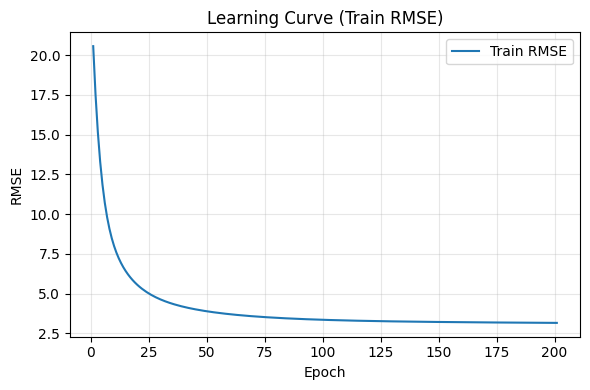

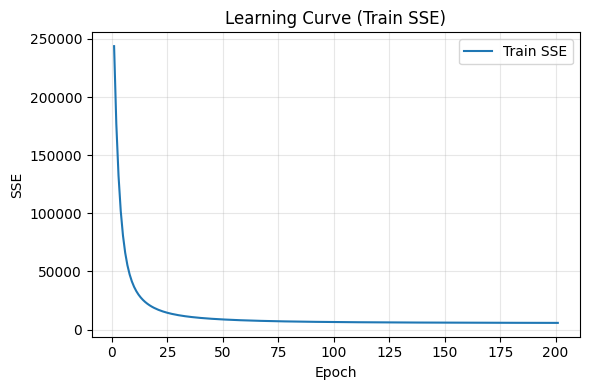

In [90]:
epochs_axis = np.arange(1, len(train_rms_hist) + 1)
#RMSE
plt.figure(figsize=(6,4))
plt.plot(epochs_axis, train_rms_hist, label='Train RMSE')
plt.xlabel('Epoch'); plt.ylabel('RMSE')
plt.title('Learning Curve (Train RMSE)')
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout(); plt.show()

#SSE
plt.figure(figsize=(6,4))
plt.plot(epochs_axis, train_sse_hist, label='Train SSE')
plt.xlabel('Epoch'); plt.ylabel('SSE')
plt.title('Learning Curve (Train SSE)')
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout(); plt.show()

- (5)regression result with training labels

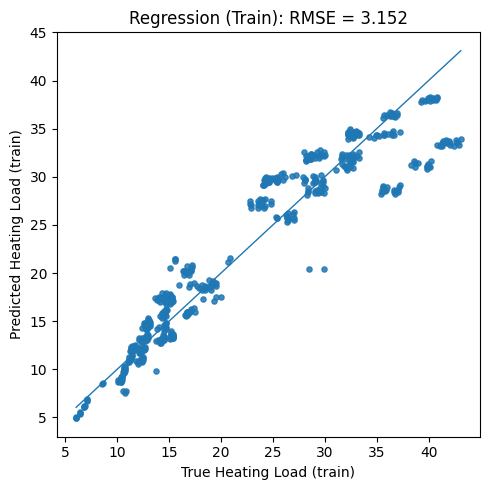

In [91]:
plt.figure(figsize=(5,5))
plt.scatter(ytr[:,0], yhat_tr[:,0], s=14, alpha=0.85)
mm = [float(ytr.min()), float(ytr.max())]
plt.plot(mm, mm, linewidth=1)  
plt.xlabel('True Heating Load (train)')
plt.ylabel('Predicted Heating Load (train)')
plt.title(f'Regression (Train): RMSE = {tr_rms:.3f}')
plt.tight_layout(); plt.show()

- (6)regression result with testing labels

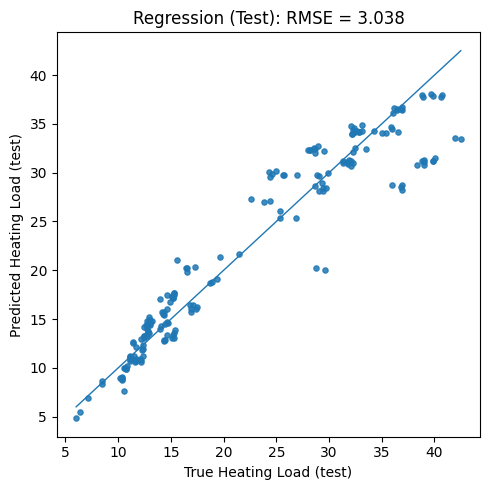

In [92]:
plt.figure(figsize=(5,5))
plt.scatter(yte[:,0], yhat_te[:,0], s=14, alpha=0.85)
mm = [float(yte.min()), float(yte.max())]
plt.plot(mm, mm, linewidth=1)
plt.xlabel('True Heating Load (test)')
plt.ylabel('Predicted Heating Load (test)')
plt.title(f'Regression (Test): RMSE = {te_rms:.3f}')
plt.tight_layout(); plt.show()

- Another way to perform:

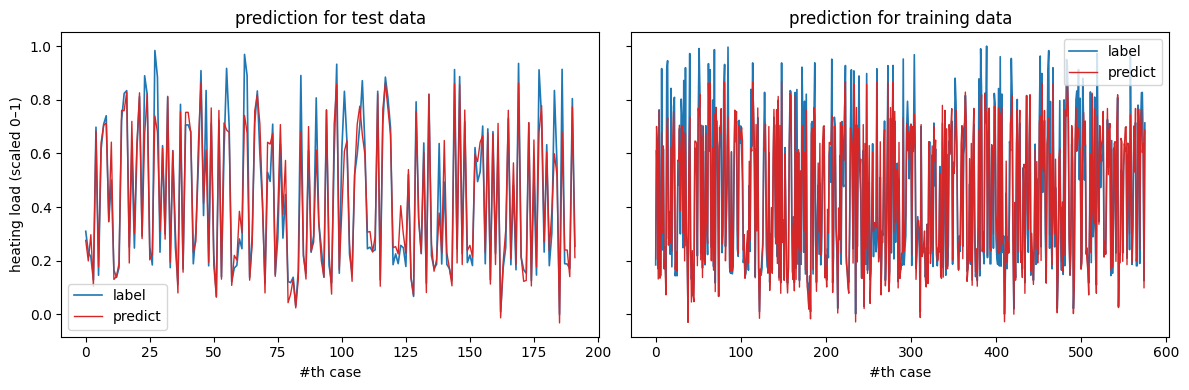

In [93]:
do_minmax = True
if do_minmax:
    y_all = np.vstack([ytr, yte]) 
    y_min, y_max = y_all.min(), y_all.max()
    s = lambda a: (a - y_min) / (y_max - y_min + 1e-8)
    ytr_plot    = s(ytr);     yhat_tr_plot = s(yhat_tr)
    yte_plot    = s(yte);     yhat_te_plot = s(yhat_te)
    y_label = "heating load (scaled 0–1)"
else:
    ytr_plot, yhat_tr_plot = ytr, yhat_tr
    yte_plot, yhat_te_plot = yte, yhat_te
    y_label = "heating load"

x_tr = np.arange(len(ytr_plot))
x_te = np.arange(len(yte_plot))

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# (6) prediction for test data
axes[0].plot(x_te, yte_plot[:,0],  color='C0', label='label',  linewidth=1.2)
axes[0].plot(x_te, yhat_te_plot[:,0], color='C3', label='predict', linewidth=1.0)
axes[0].set_title('prediction for test data')
axes[0].set_xlabel('#th case'); axes[0].set_ylabel(y_label)
axes[0].legend()

# (5) prediction for training data
axes[1].plot(x_tr, ytr_plot[:,0],  color='C0', label='label',  linewidth=1.2)
axes[1].plot(x_tr, yhat_tr_plot[:,0], color='C3', label='predict', linewidth=1.0)
axes[1].set_title('prediction for training data')
axes[1].set_xlabel('#th case')
axes[1].legend()

plt.tight_layout()
plt.show()

#### (c) Design a feature selection procedure to find out which input features influence the energy load significantly and explain why it works. You may compare the performance of choosing different features. 

- 1. Calculate Correlation Coefficient

In [99]:
y = ytr[:, 0]
r_each = np.zeros(Xtr.shape[1], dtype=np.float64)
for j in range(Xtr.shape[1]):
    x = Xtr[:, j]
    xm, ym = x.mean(), y.mean()
    num = np.sum((x - xm) * (y - ym))
    den = np.sqrt(np.sum((x - xm)**2) * np.sum((y - ym)**2)) + 1e-12
    r_each[j] = num / den

- 2. Group one-hot

In [100]:
groups, group_labels = [], []
ori_idx = [i for i,n in enumerate(feat_names) if n.startswith('ori_')]
gla_idx = [i for i,n in enumerate(feat_names) if n.startswith('gla_')]
if ori_idx: groups.append(ori_idx); group_labels.append('Orientation')
if gla_idx: groups.append(gla_idx); group_labels.append('GlazingDist')
for i, n in enumerate(feat_names): 
    if (i not in ori_idx) and (i not in gla_idx):
        groups.append([i]); group_labels.append(n)

- 3. GroupBy with agg="max"

In [101]:
agg = 'max'
r_group = []
rep_name = []  
for idxs in groups:
    vals = np.abs(r_each[idxs])
    k = int(np.argmax(vals))
    r_group.append(vals[k]); rep_name.append(feat_names[idxs[k]])
r_group = np.array(r_group)

- 4. Plot one-row Heatmap and list frequency features by descending order

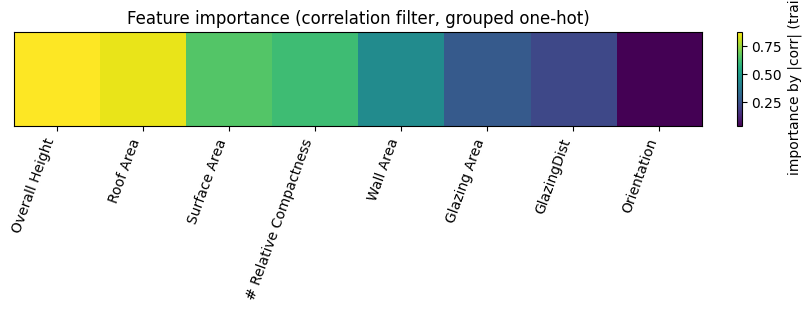

      Overall Height  |corr|=0.881  (rep=Overall Height)
           Roof Area  |corr|=0.853  (rep=Roof Area)
        Surface Area  |corr|=0.653  (rep=Surface Area)
# Relative Compactness  |corr|=0.617  (rep=# Relative Compactness)
           Wall Area  |corr|=0.440  (rep=Wall Area)
        Glazing Area  |corr|=0.271  (rep=Glazing Area)
         GlazingDist  |corr|=0.216  (rep=gla_uniform)
         Orientation  |corr|=0.031  (rep=ori_east)


In [103]:
order = np.argsort(r_group)[::-1]
fig = plt.figure(figsize=(max(8, len(order)*0.45), 3), constrained_layout=True)
plt.imshow(r_group[order][None, :], aspect='auto', cmap='viridis')
plt.yticks([])
plt.xticks(range(len(order)), [group_labels[i] for i in order], rotation=70, ha='right')
cbar = plt.colorbar()
cbar.set_label('importance by |corr| (train)')
plt.title('Feature importance (correlation filter, grouped one-hot)')
plt.show()

topk = min(10, len(order))
for idx in order[:topk]:
    extra = f"  (rep={rep_name[idx]})" if rep_name[idx] is not None else ""
    print(f"{group_labels[idx]:>20s}  |corr|={r_group[idx]:.3f}{extra}")